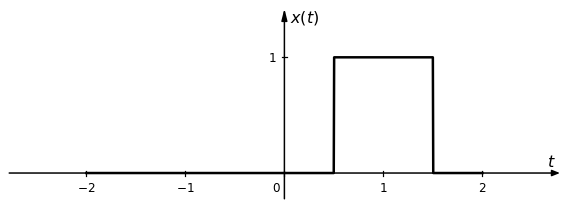

In [9]:
# 1. Usar todo junto (estilo actual)

from blockdiagrams import SignalPlotter

SignalPlotter("rect(t-1)", horiz_range=(-2, 2), vert_range=(0,1.2)).plot()

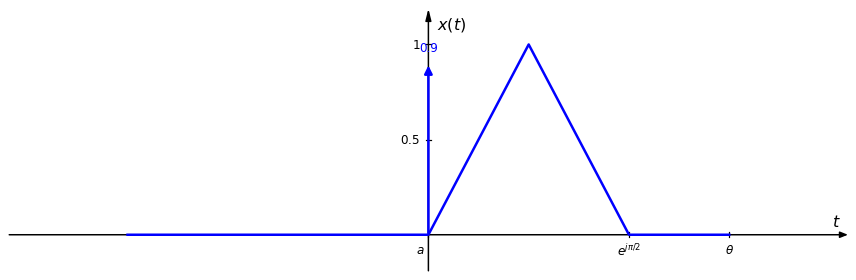

In [1]:
# 2. Usar modularmente

from blockdiagrams import SignalPlotter

p = SignalPlotter("0.9* delta(t) + tri(t - 1)", horiz_range=(-3, 3), figsize=(12,4), color='blue')
p.setup_axes()
p.draw_labels()
p.draw_function()
p.draw_impulses()
p.draw_ticks(xticks=[0, 2, 3], xtick_labels=['a','e^{j\\pi/2}', '\\theta'])
p.show()


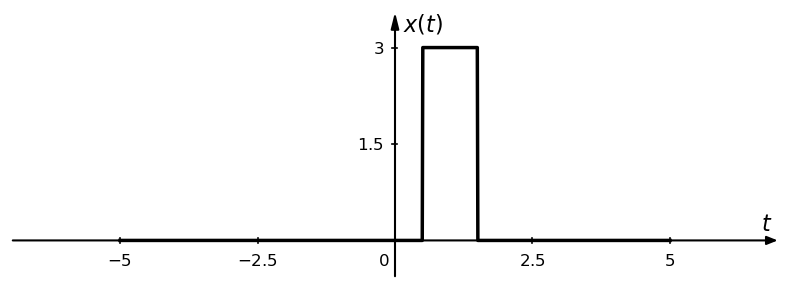

In [5]:
# 3. Usar funciones personalizadas

from blockdiagrams import SignalPlotter

SignalPlotter("3 * rect(t - 1)").plot()

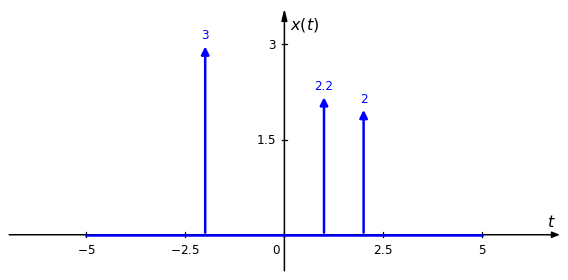

In [2]:
# 4. Impulsos con múltiples raíces

from blockdiagrams import SignalPlotter

SignalPlotter("delta(t/2-1) + 2.2*delta(t - 1) + 3*delta(t + 2)", color='blue', figsize=(8,4)).plot()


In [3]:
# 5. Guardar a archivo

from blockdiagrams import SignalPlotter

SignalPlotter("sin(t)*rect(t/2)", save_path="salida.png", show_plot=False).plot()


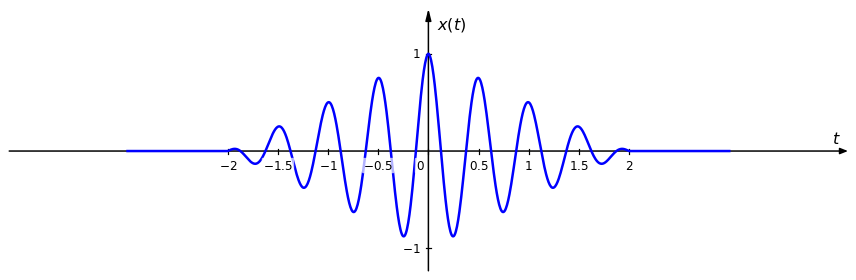

In [4]:
from blockdiagrams import SignalPlotter
import numpy as np

signal1 = SignalPlotter("cos(4 pi t)*tri(t/2)", alpha=0.7, horiz_range=[-3, 3], xticks=np.linspace(-2, 2, 9), color='blue', figsize=(12,4))
signal1.plot()


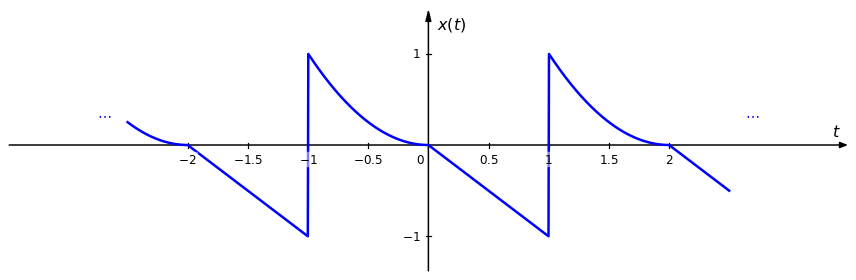

In [1]:
from blockdiagrams import SignalPlotter
import numpy as np

signal1 = SignalPlotter("pw((t**2, (t>-1) & (t<0)), (-t, (t>=0) & (t<1)), (0, True))", horiz_range=[-2.5, 2.5], xticks=np.linspace(-2, 2, 9), color='blue', figsize=(12,4), periodo=2)
signal1.plot()


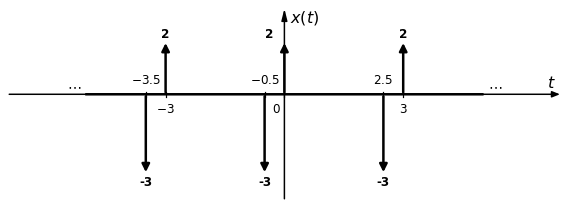

In [4]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=2*delta(t) - 3*delta(t+0.5)", yticks=None, periodo=3).plot()


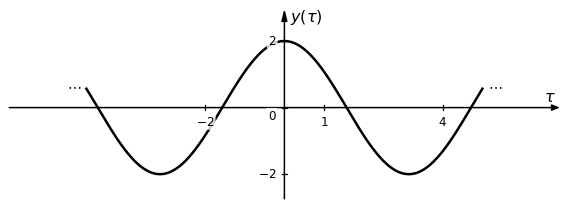

In [ ]:
from blockdiagrams import SignalPlotter

signal1 = SignalPlotter(r'y(\tau)=2*cos(\tau)',alpha=0.8, xticks='auto')
signal1.plot()

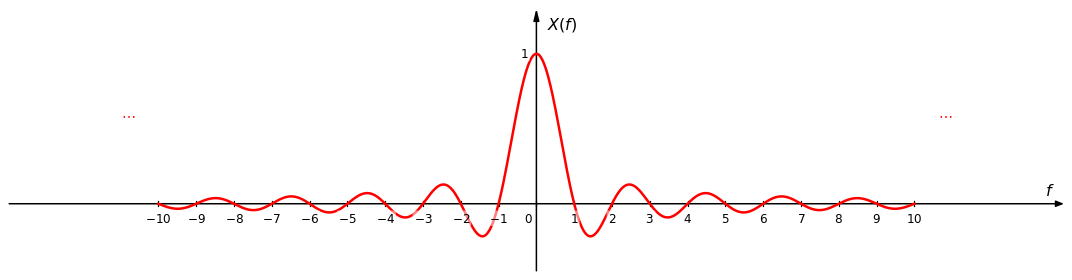

In [9]:
from blockdiagrams import SignalPlotter
import numpy as np

SignalPlotter("X(f)=sinc(f)", horiz_range=[-10, 10], xticks=np.linspace(-10, 10, 21), figsize=(15, 4), color='red').plot()

In [4]:
%matplotlib notebook
from blockdiagrams import SignalPlotter

sp = SignalPlotter("X(f)=sin(pi f)/(pi f)", horiz_range=(-10, 10), num_points=500)
sp.plot()

# Esta llamada devuelve el HTML con la animación embebida, que Jupyter muestra
sp.animate_signal(interval=10)


<IPython.core.display.Javascript object>

AttributeError: 'SignalPlotter' object has no attribute 'animate_signal'

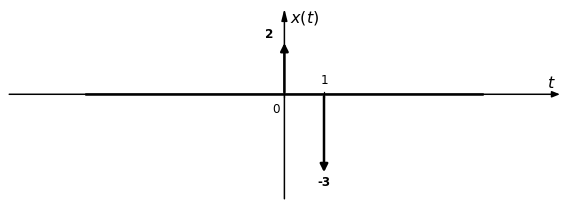

In [10]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=2*delta(t) - 3*delta(t-1)", periodo=None,
              yticks=[]).plot()

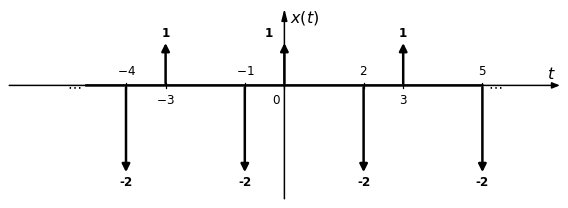

In [11]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=delta(t) - 2*delta(t-2)", yticks=None, periodo=3, horiz_range=(-5,5)).plot()

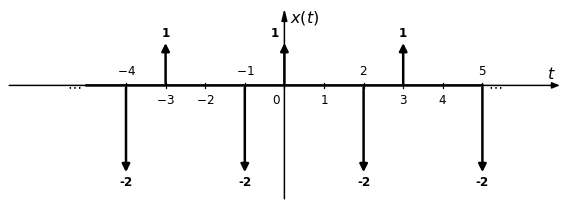

In [1]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=delta(t) - 2*delta(t-2)", periodo=3, horiz_range=(-5,5),
              xticks=[-2,1, 4], xtick_labels=['A','B','C'], yticks=[]).plot()

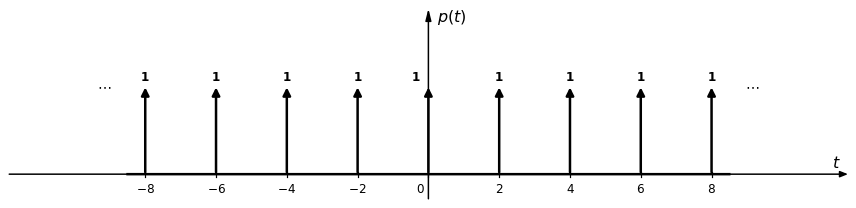

In [2]:
from blockdiagrams import SignalPlotter

SignalPlotter("p(t)=delta(t)", yticks=None, periodo=2, horiz_range=(-8.5,8.5), vert_range=[0,1.5], figsize=[12, 3]).plot()

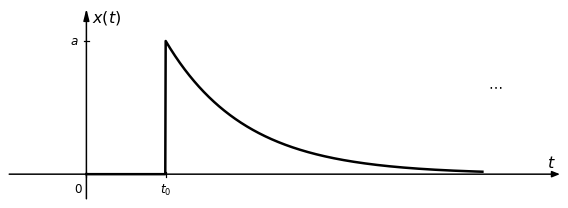

In [13]:
from blockdiagrams import SignalPlotter
import numpy as np

SignalPlotter("x(t)=exp(-(t-1))*u(t-1)", xticks=[0, 1], xtick_labels=[0,'t_0'], yticks=[1], ytick_labels=['a'], horiz_range=[0, 5]).plot()